# Crisp Metrics Task 2-: 
- ## Perform Data analysis and use different machine learning algorithms.
- ## Compare at least 3 different Algorithms and show their accuracies with the help of graph

# Machine Learning

### machine learning allows computers to find hidden insights without being explicitly programmed, computer Program learns from the data as an input and does some prediction as an output. 

### There are 3 main types of machine learning i.e. 

- Supervised Learning --> Regression and classification
- Unsupervised Learning ---> clustering
- Reinforcement Learning ---> learns from itself


# Problem Statement
This is a classification problem of supervised machine learning. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

0 – Absence of Diabetes

1 – Presence of Diabetes

In [2]:
# Import all Major libararies 
# !pip install -U scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

# ignore warnings 
warnings.filterwarnings('ignore')

# seaborn visualization setup 
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
# Load the dataset          
dataFrame = pd.read_csv('diabetes_data.csv')

In [4]:
dataFrame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Chech the number of rows and columns. 
dataFrame.shape


(768, 9)

In [6]:
# so from above we can see that this data has 768 rows and 9 columns 

In [7]:
# To check colimns and their datatype 
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# So from above we can see 7 columns has int64 datatype and 2 columns has float64 datatype 

In [9]:
dataFrame.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Data Exploration and visualization (EDA)

## Check the distribution of the target variable (outcome)


<AxesSubplot:xlabel='Outcome', ylabel='count'>

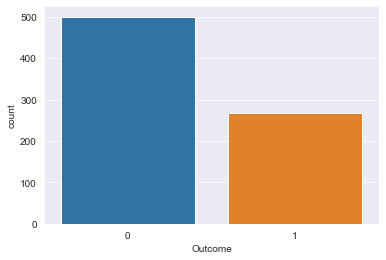

In [9]:
# Plotting the distribution of the outcome 
sns.countplot(x='Outcome',data=dataFrame)

In [11]:
# Check the distribution of the predictor variables . here we will use both distplot and box plot as shown below 
# Let us plot variable to show its distribution in the dataset 


(<AxesSubplot:>, <AxesSubplot:>)

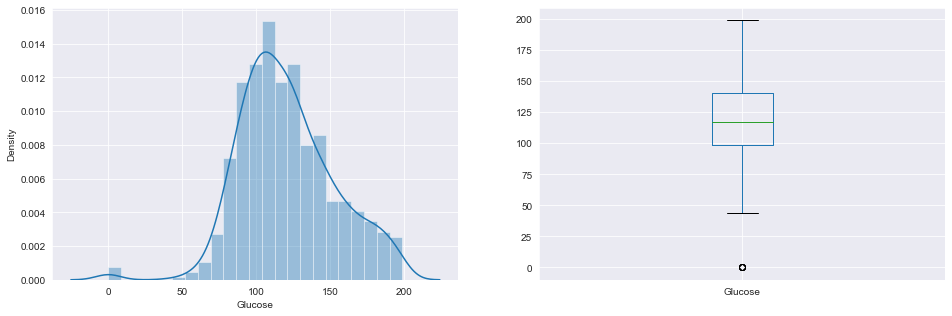

In [12]:
plt.subplot(121),sns.distplot(dataFrame['Glucose'])
plt.subplot(122),dataFrame['Glucose'].plot.box(figsize=(16,5))

In [13]:
# Above 2 plot are the distribution of the Glucose 

(<AxesSubplot:>, <AxesSubplot:>)

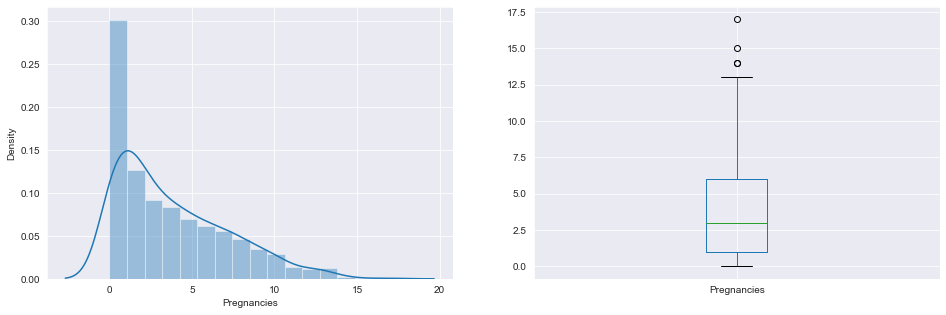

In [14]:
plt.subplot(121),sns.distplot(dataFrame['Pregnancies'])
plt.subplot(122),dataFrame['Pregnancies'].plot.box(figsize=(16,5))

In [15]:
# above 2 plot are the distribution of the pregnancies  

(<AxesSubplot:>, <AxesSubplot:>)

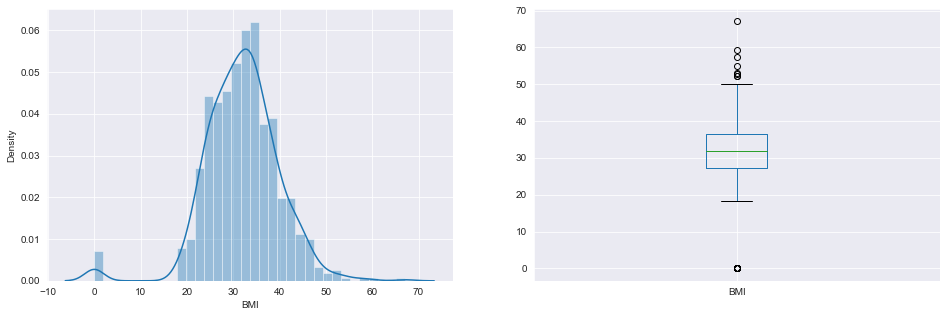

In [16]:
plt.subplot(121),sns.distplot(dataFrame['BMI'])
plt.subplot(122),dataFrame['BMI'].plot.box(figsize=(16,5))

In [17]:
#above 2 plot are the distribution of the BMI 

(<AxesSubplot:>, <AxesSubplot:>)

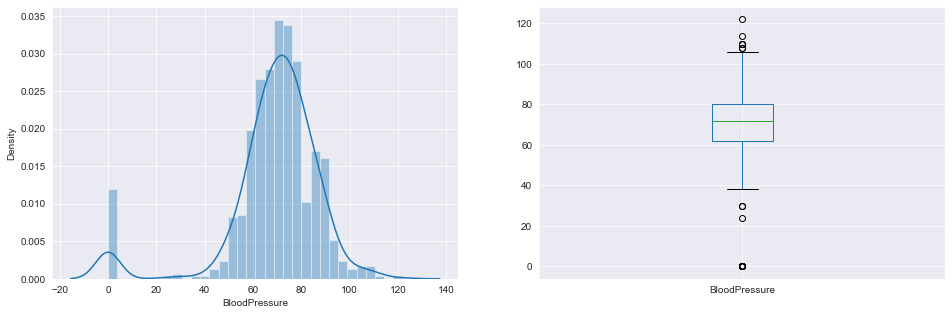

In [18]:
plt.subplot(121),sns.distplot(dataFrame['BloodPressure'])
plt.subplot(122),dataFrame['BloodPressure'].plot.box(figsize=(16,5))

In [19]:
# above 2 plot are the distribution of the B.P

(<AxesSubplot:>, <AxesSubplot:>)

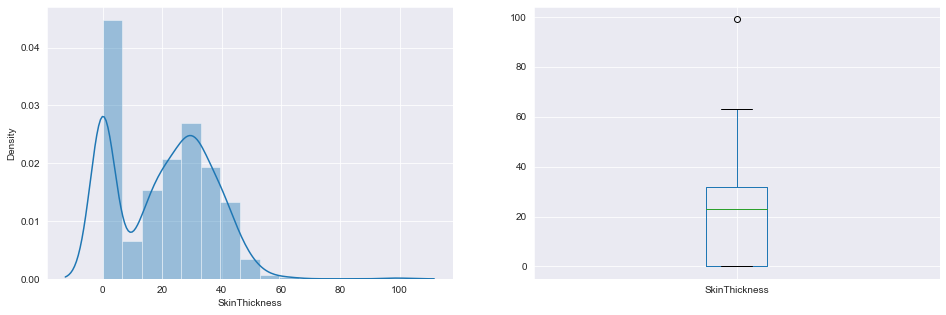

In [20]:
plt.subplot(121),sns.distplot(dataFrame['SkinThickness'])
plt.subplot(122),dataFrame['SkinThickness'].plot.box(figsize=(16,5))

In [21]:
# above 2 plot are the distribution of the skin thickness 


(<AxesSubplot:>, <AxesSubplot:>)

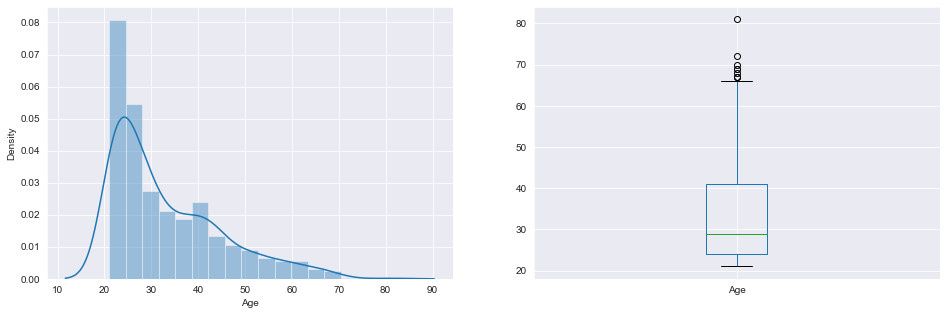

In [22]:
plt.subplot(121),sns.distplot(dataFrame['Age'])
plt.subplot(122),dataFrame['Age'].plot.box(figsize=(16,5))

In [23]:
# above 2 plot are the distribution of the age 

(<AxesSubplot:>, <AxesSubplot:>)

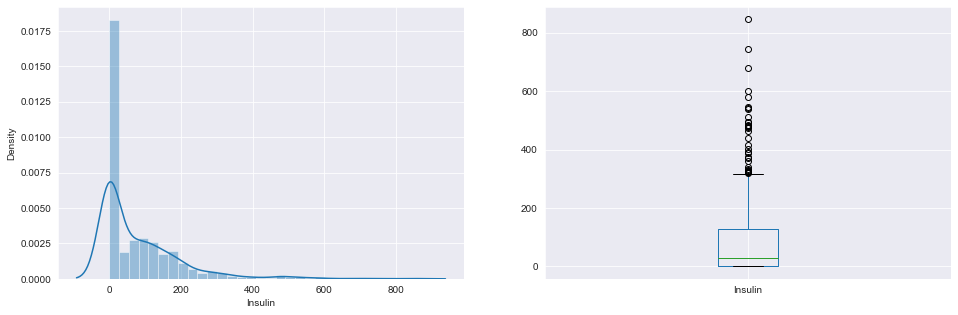

In [24]:
plt.subplot(121),sns.distplot(dataFrame['Insulin'])
plt.subplot(122),dataFrame['Insulin'].plot.box(figsize=(16,5))

In [25]:
# above 2 plot are the distribution of the insulin 

(<AxesSubplot:>, <AxesSubplot:>)

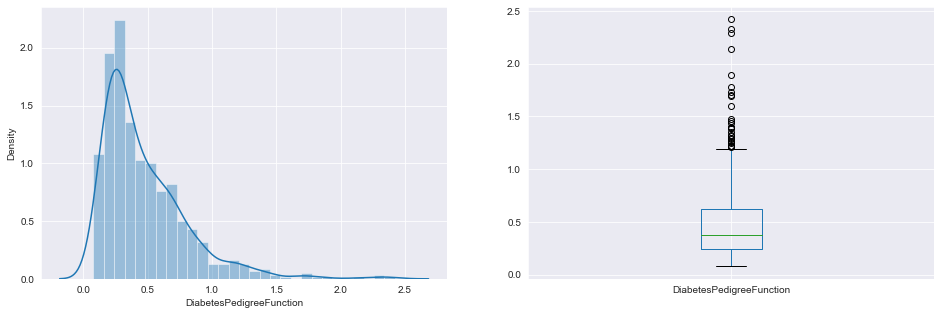

In [26]:
plt.subplot(121),sns.distplot(dataFrame['DiabetesPedigreeFunction'])
plt.subplot(122),dataFrame['DiabetesPedigreeFunction'].plot.box(figsize=(16,5))  

In [27]:
#above 2 plot are the distribution of the DiabetesPedigreeFunction

## Checking for any missing values in the data set 

In [28]:
#Check for missing values 
dataFrame.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Plotting relationships in the dataset.**

There are different ways to display relationships using a dataset. You can use pair plots, joint plots, correlations, etc. we will the use pairplot to find out relationships in the dataset.

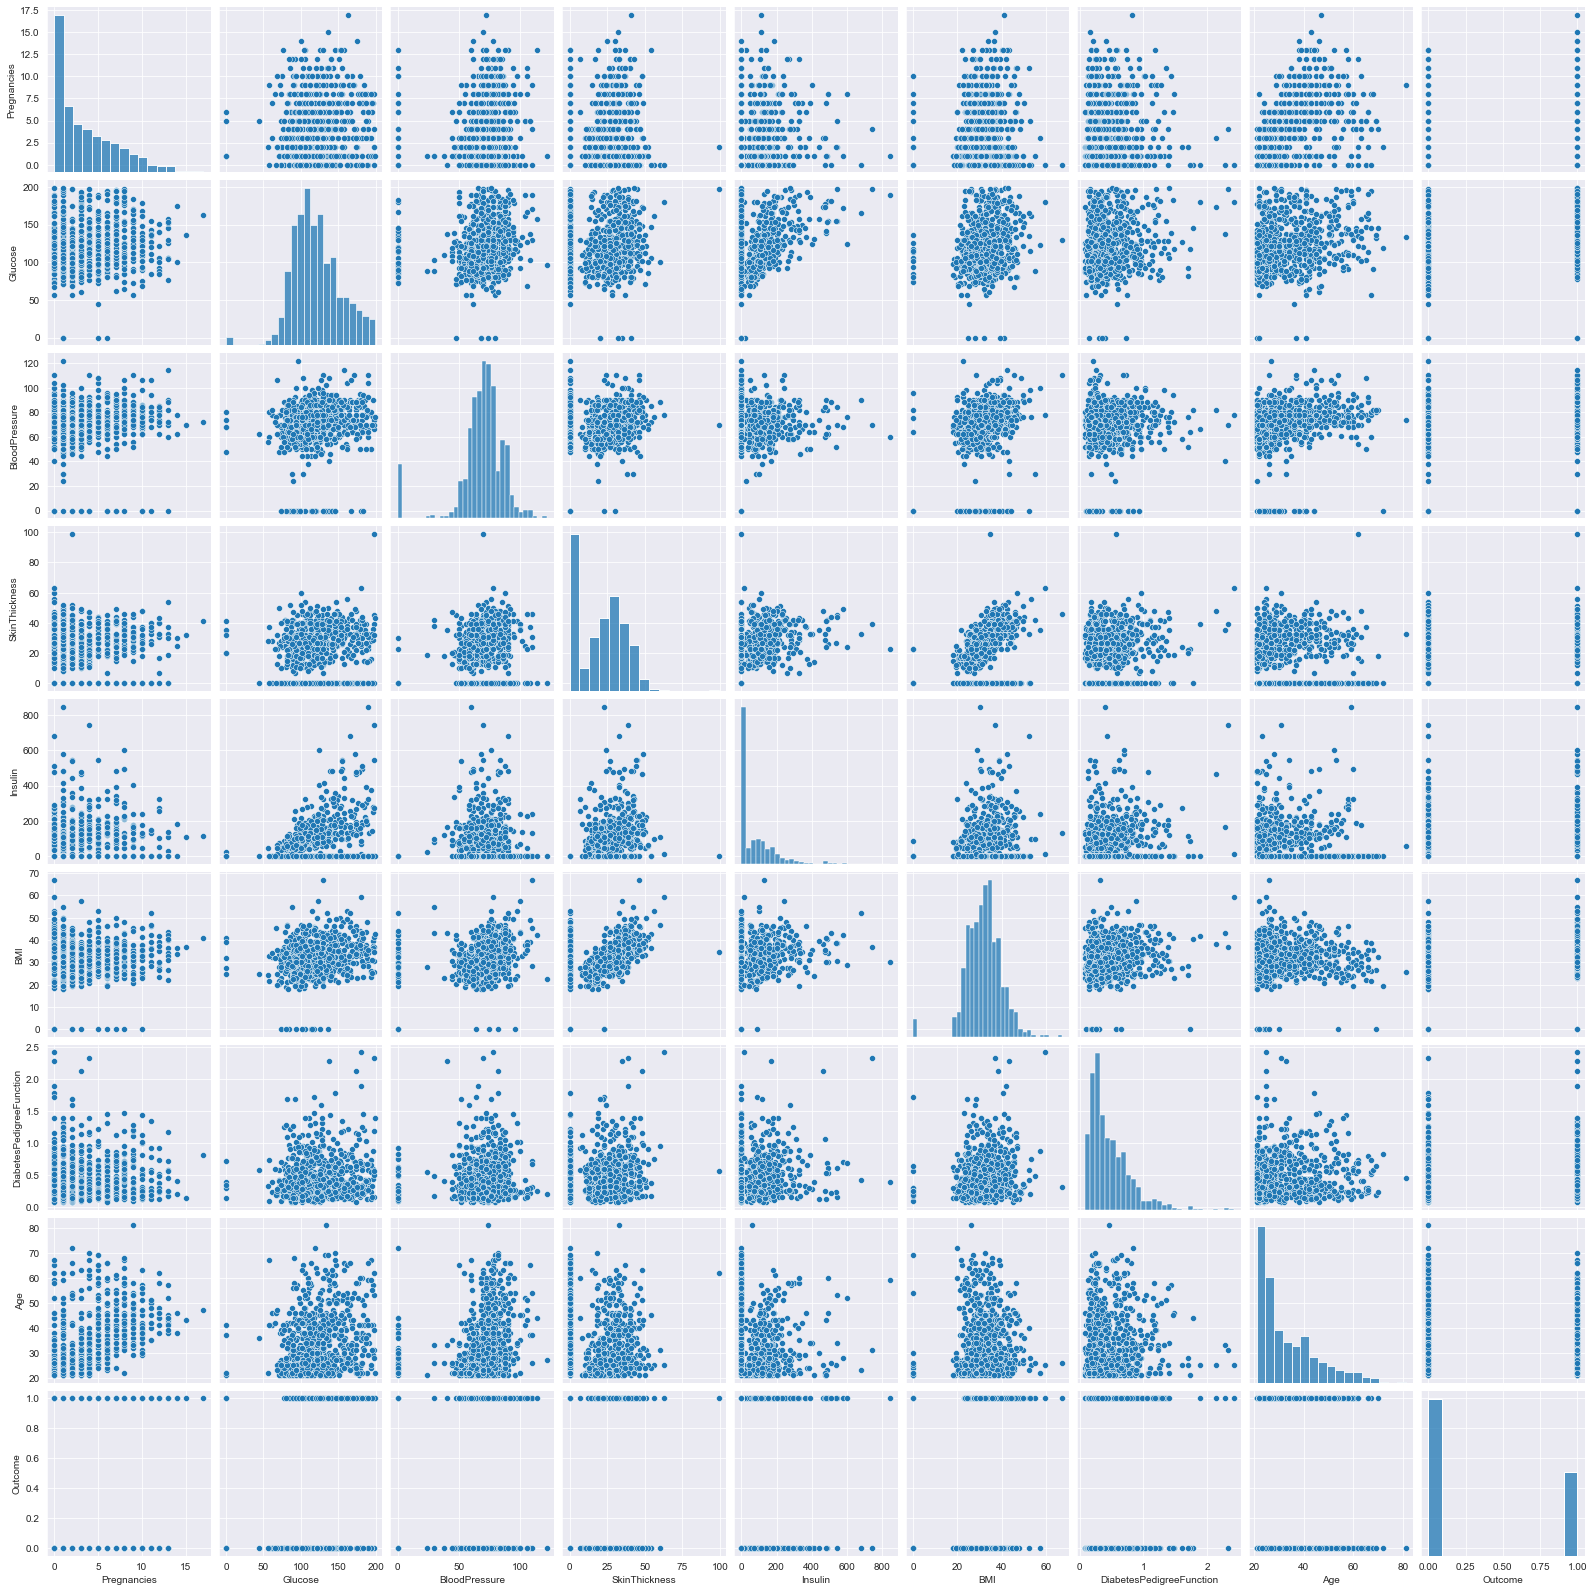

In [29]:
sns.pairplot(dataFrame)

In [30]:
# Check correlations 
dataFrame.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


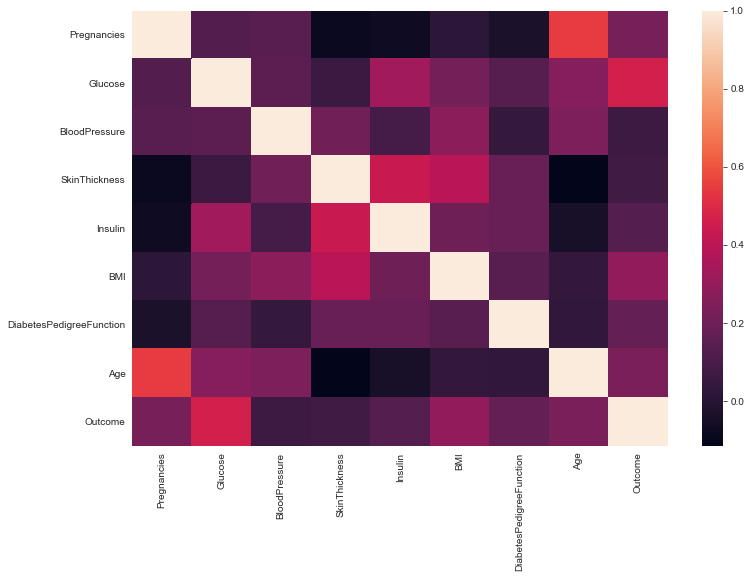

In [31]:
# We can plot the correlations using a heatmap as shown below.

matrix = dataFrame.corr()
ax = plt.subplots(figsize=(12,8)),sns.heatmap(matrix)

# Training the data 

In [32]:
# SPLIT the dataset 
X = dataFrame.drop('Outcome',axis=1)
y = dataFrame['Outcome']

In [33]:
# After successfully splitting the dataset, let us train it using train_test_split. 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [34]:
# Check columns with zero values 

print("Total number of rows: {0}",format(len(dataFrame)))

print("Number of rows missing pregnancies: {0}",format(len(dataFrame.loc[dataFrame['Pregnancies']==0])))

print("Number of rows missing Glucose: {0}",format(len(dataFrame.loc[dataFrame['Glucose']==0])))

print("Number of rows missing BloodPressure: {0}",format(len(dataFrame.loc[dataFrame['BloodPressure']==0])))

print("Number of rows missing SkinThickness: {0}",format(len(dataFrame.loc[dataFrame['SkinThickness']==0])))

print("Number of rows missing Insulin: {0}",format(len(dataFrame.loc[dataFrame['Insulin']==0])))

print("Number of rows missing BMI: {0}",format(len(dataFrame.loc[dataFrame['BMI']==0])))

print("Number of rows missing DiabetesPedigreeFunction: {0}",format(len(dataFrame.loc[dataFrame['DiabetesPedigreeFunction']==0])))

print("Number of rows missing Age: {0}",format(len(dataFrame.loc[dataFrame['Age']==0])))

Total number of rows: {0} 768
Number of rows missing pregnancies: {0} 111
Number of rows missing Glucose: {0} 5
Number of rows missing BloodPressure: {0} 35
Number of rows missing SkinThickness: {0} 227
Number of rows missing Insulin: {0} 374
Number of rows missing BMI: {0} 11
Number of rows missing DiabetesPedigreeFunction: {0} 0
Number of rows missing Age: {0} 0


In [35]:
# Imputing the zero values in the dataset 
import numpy as np 
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy='mean')

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

# a. Random Forests

In [36]:
# Building the model using RandomForest 

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [37]:
rfc_pred = rfc.predict(X_test)

In [38]:
# Here is the accuracy score 
# getting the accuracy score for RandomForest 

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test,rfc_pred)))

Accuracy_Score = 0.7922077922077922


In [39]:
# Random forest gives an accuracy score of 0.7922

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[127  23]
 [ 25  56]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       150
           1       0.71      0.69      0.70        81

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



# b. Decision Trees 

In [41]:
# Building the model using Decision Tree

from sklearn.tree import DecisionTreeClassifier 

dtree = DecisionTreeClassifier() 
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
predictions = dtree.predict(X_test)

In [43]:
# Here is the accuracy score 
# getting the accuracy score for RandomForest 

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy_Score = 0.7445887445887446


In [44]:
# Decision tree  gives an accuracy score of 0.7575

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[123  27]
 [ 32  49]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       150
           1       0.64      0.60      0.62        81

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



# c. XGBoost 

In [46]:
# !pip install xgboost


In [47]:
# Building the model using XGBoost 

from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0) 
xgb_model.fit(X_train,y_train)

[03:36:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
xgb_pred = xgb_model.predict(X_test)

In [49]:
# Here is the accuracy score 
# getting the accuracy score for XGBoost  

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test,xgb_pred)))

Accuracy_Score = 0.7705627705627706


In [50]:
# XGB  gives an accuracy score of 0.7705 

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

[[124  26]
 [ 27  54]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       150
           1       0.68      0.67      0.67        81

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



# D. Support Vector Machine (SVM)

In [52]:
# Building the model using SVM 
from sklearn.svm import SVC

svc_model = SVC() 
svc_model.fit(X_train,y_train)

SVC()

In [53]:
# prediction 
svc_pred = svc_model.predict(X_test)

In [54]:
# Here is the accuracy score 
# getting the accuracy score for SVM 

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test,svc_pred)))

Accuracy_Score = 0.7705627705627706


In [55]:
# svc  gives an accuracy score of 0.7706. 

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

[[137  13]
 [ 40  41]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       150
           1       0.76      0.51      0.61        81

    accuracy                           0.77       231
   macro avg       0.77      0.71      0.72       231
weighted avg       0.77      0.77      0.76       231



In [57]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()  
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test,logreg_pred)))


Accuracy_Score = 0.7965367965367965


In [58]:
# Gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
grad_pred = gb.predict(X_test)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test,grad_pred)))

Accuracy_Score = 0.7489177489177489


# Model Selection
Basing our selection criteria on the accuracy score, the best model for this project is XGBoost which gives an Accuracy Score of 0.779 (78%). There are different ways of determining the best model that you can explore and use for your models. For this basic introduction to machine learning, I decided to use the accuracy score as the main metric in choosing the best model.

# Feature Importances

As data scientists, we often focus on optimizing model performance for our projects. However, it is important to understand how the features(variables) in our model contribute to prediction. We will then look at the features that are most important when we use the XGBoost model for diabetes prediction.

In [59]:
# Getting feature importances 
rfc.feature_importances_

array([0.07998925, 0.25668017, 0.08601108, 0.07644351, 0.08532258,
       0.15719474, 0.12392184, 0.13443683])

<AxesSubplot:>

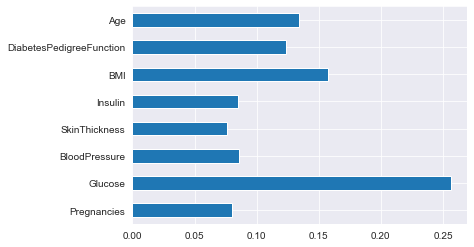

In [60]:
# Plotting features importances 

(pd.Series(rfc.feature_importances_,index=X.columns).plot(kind='barh'))

# Predictions


In [61]:
# Printing prediction probabilities for the training data 
print('prediction probabilities')
rfc.predict_proba(X_test)

prediction probabilities


array([[0.43 , 0.57 ],
       [0.14 , 0.86 ],
       [0.845, 0.155],
       [0.575, 0.425],
       [0.92 , 0.08 ],
       [0.365, 0.635],
       [0.175, 0.825],
       [0.84 , 0.16 ],
       [0.405, 0.595],
       [0.78 , 0.22 ],
       [0.99 , 0.01 ],
       [0.87 , 0.13 ],
       [0.67 , 0.33 ],
       [0.64 , 0.36 ],
       [0.805, 0.195],
       [0.265, 0.735],
       [0.165, 0.835],
       [0.965, 0.035],
       [0.495, 0.505],
       [0.975, 0.025],
       [0.725, 0.275],
       [0.73 , 0.27 ],
       [0.4  , 0.6  ],
       [0.775, 0.225],
       [0.925, 0.075],
       [0.215, 0.785],
       [0.925, 0.075],
       [0.615, 0.385],
       [0.995, 0.005],
       [0.45 , 0.55 ],
       [0.195, 0.805],
       [0.525, 0.475],
       [0.43 , 0.57 ],
       [0.505, 0.495],
       [0.94 , 0.06 ],
       [0.875, 0.125],
       [0.59 , 0.41 ],
       [0.305, 0.695],
       [0.175, 0.825],
       [0.91 , 0.09 ],
       [0.955, 0.045],
       [0.395, 0.605],
       [0.88 , 0.12 ],
       [0.4

In [62]:
# Printing prediction probabilities for the test data 
predictionProbability = rfc.predict_proba(X_test)
prediction = rfc.predict(X_test)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.43  0.57 ]
 [0.14  0.86 ]
 [0.845 0.155]
 [0.575 0.425]
 [0.92  0.08 ]
 [0.365 0.635]
 [0.175 0.825]
 [0.84  0.16 ]
 [0.405 0.595]
 [0.78  0.22 ]
 [0.99  0.01 ]
 [0.87  0.13 ]
 [0.67  0.33 ]
 [0.64  0.36 ]
 [0.805 0.195]
 [0.265 0.735]
 [0.165 0.835]
 [0.965 0.035]
 [0.495 0.505]
 [0.975 0.025]
 [0.725 0.275]
 [0.73  0.27 ]
 [0.4   0.6  ]
 [0.775 0.225]
 [0.925 0.075]
 [0.215 0.785]
 [0.925 0.075]
 [0.615 0.385]
 [0.995 0.005]
 [0.45  0.55 ]
 [0.195 0.805]
 [0.525 0.475]
 [0.43  0.57 ]
 [0.505 0.495]
 [0.94  0.06 ]
 [0.875 0.125]
 [0.59  0.41 ]
 [0.305 0.695]
 [0.175 0.825]
 [0.91  0.09 ]
 [0.955 0.045]
 [0.395 0.605]
 [0.88  0.12 ]
 [0.495 0.505]
 [0.885 0.115]
 [0.945 0.055]
 [0.49  0.51 ]
 [0.84  0.16 ]
 [0.445 0.555]
 [0.95  0.05 ]
 [0.95  0.05 ]
 [0.78  0.22 ]
 [0.79  0.21 ]
 [0.545 0.455]
 [0.885 0.115]
 [0.875 0.125]
 [0.63  0.37 ]
 [0.83  0.17 ]
 [0.32  0.68 ]
 [0.855 0.145]
 [0.77  0.23 ]
 [0.68  0.32 ]
 [0.125 0.875]
 [0.62  0.38 ]
 [0.715 0.285]
 [0.455 0.54

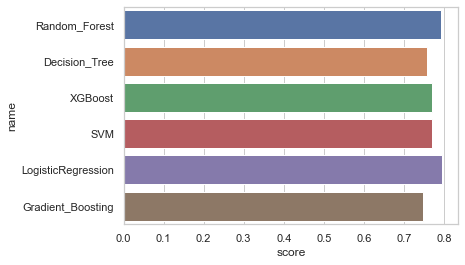

In [63]:
names = ["Random_Forest", "Decision_Tree", "XGBoost", "SVM","LogisticRegression","Gradient_Boosting"]
scores = [0.79220,0.7575,0.7705,0.7705,0.7965,0.74891]

df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [64]:
names = ["Random_Forest", "Decision_Tree", "XGBoost", "SVM","LogisticRegression","Gradient_Boosting"]

classifiers = [
    RandomForestClassifier(n_estimators=200),
    DecisionTreeClassifier(),
     XGBClassifier(gamma=0),
    SVC(),
    LogisticRegression(),
    GradientBoostingClassifier(random_state=0)
    ]

scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)
    
scores


df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

[03:37:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,name,score
0,Random_Forest,0.783550
1,Decision_Tree,0.761905
2,XGBoost,0.770563
3,SVM,0.770563
4,LogisticRegression,0.796537
5,Gradient_Boosting,0.748918


In [65]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s



,name,score
0,Random_Forest,0.783550
1,Decision_Tree,0.761905
2,XGBoost,0.770563
3,SVM,0.770563
4,LogisticRegression,0.796537
5,Gradient_Boosting,0.748918


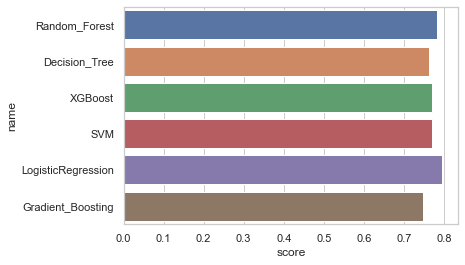

In [66]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)